<a href="https://colab.research.google.com/github/supakornkr/RoadToDE-Workshop/blob/main/Data_Cleansing_with_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xzvf spark-3.3.1-bin-hadoop3.tgz

In [2]:
!update-alternatives --list java #find path of java

/usr/lib/jvm/java-11-openjdk-amd64/bin/java


In [3]:
pip install -q findspark==2.0.1

In [4]:
import os
os.environ["JAVA_HOME"] = '/usr/lib/jvm/java-11-openjdk-amd64'
os.environ["SPARK_HOME"] = '/content/spark-3.3.1-bin-hadoop3'

In [ ]:
pip install pyspark==3.3.1

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [7]:
import sys
sys.version_info

sys.version_info(major=3, minor=8, micro=16, releaselevel='final', serial=0)

In [ ]:
!wget -O data.zip https://file.designil.com/zdOfUE+
!unzip data.zip

### Load data to spark

In [9]:
dt = spark.read.csv("/content/ws2_data.csv", header=True, inferSchema=True)

### Data Profiling

In [10]:
print(dt.count(),len(dt.columns))

500000 5


In [11]:
dt.describe().show()

+-------+--------+-----------------+-------+------------------+
|summary| user_id|          book_id|country|             price|
+-------+--------+-----------------+-------+------------------+
|  count|  499998|           500000| 500000|            500000|
|   mean|Infinity|       740.377786|   null|31.459311680039008|
| stddev|     NaN|559.9366172146341|   null|10.945931459891705|
|    min|00000f49|                1|Algeria|               0.0|
|    max|ffffe3e7|             2269|  Yemen|              84.0|
+-------+--------+-----------------+-------+------------------+



In [12]:
dt.select("price").describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            500000|
|   mean|31.459311680039008|
| stddev|10.945931459891705|
|    min|               0.0|
|    max|              84.0|
+-------+------------------+



In [13]:
dt.where(dt.user_id.isNull()).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



### Step 3) EDA - Exploratory Data Analysis

Non-Graphical EDA

In [14]:
dt.where(dt.price > 10).show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [15]:
dt.where(dt.country == 'Canada').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 14:50:52|3553ebbb|     14| Canada| 28.0|
|2021-05-01 00:01:09|b07799e7|     20| Canada| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20| Canada| 28.0|
|2021-05-01 10:01:44|c52587cc|     20| Canada| 28.0|
|2021-05-01 23:49:22|bfdfeeaf|     25| Canada|29.99|
|2021-05-01 14:59:03|29d98481|     30| Canada|14.95|
|2021-05-01 09:09:40|3668f113|     32| Canada|27.37|
|2021-05-01 18:46:21|1560dd3c|     33| Canada| 28.0|
|2021-05-01 09:47:19|96908d0d|     36| Canada|23.95|
|2021-05-01 14:57:06|a708a1be|     36| Canada|23.95|
|2021-05-01 15:05:55|1c489ab0|     36| Canada|23.95|
|2021-05-01 19:37:02|f9fa4aa7|     36| Canada|23.95|
|2021-05-01 06:28:07|350fb826|     39| Canada|31.47|
|2021-05-02 03:51:13|6c5822b1|     42| Canada|24.99|
|2021-05-01 13:32:34|9a3b0c50|     48| Canada| 31.5|
|2021-05-02 03:31:52|dd261c33|     49| Canada|

In [16]:
import pandas as pd
dt_pd = dt.toPandas()

In [17]:
dt_pd.head()

timestamp   user_id  book_id       country  price
0 2021-05-01 08:03:44  824dc295        2        Israel  24.95
1 2021-05-02 02:48:34  f80fe106        6      Thailand  31.49
2 2021-05-01 16:54:57  01cb9fe0        9         Italy  29.65
3 2021-05-01 21:45:28  59508f47       13  South Africa  22.40
4 2021-05-01 14:50:52  3553ebbb       14        Canada  28.00

In [18]:
import plotly.express as px
px.box(dt_pd, 'book_id')

In [19]:
px.histogram(dt_pd,'price',nbins=10)

### Step 4) Data Cleansing with Spark

In [20]:
dt.show(truncate=False)

+-------------------+--------+-------+------------------------+-----+
|timestamp          |user_id |book_id|country                 |price|
+-------------------+--------+-------+------------------------+-----+
|2021-05-01 08:03:44|824dc295|2      |Israel                  |24.95|
|2021-05-02 02:48:34|f80fe106|6      |Thailand                |31.49|
|2021-05-01 16:54:57|01cb9fe0|9      |Italy                   |29.65|
|2021-05-01 21:45:28|59508f47|13     |South Africa            |22.4 |
|2021-05-01 14:50:52|3553ebbb|14     |Canada                  |28.0 |
|2021-05-01 08:41:48|ea28260a|16     |United States of America|31.18|
|2021-05-01 05:51:43|ff44767e|18     |United States of America|59.99|
|2021-05-01 00:01:09|b07799e7|20     |Canada                  |28.0 |
|2021-05-01 00:21:24|9d2e93c8|20     |Hungary                 |28.0 |
|2021-05-01 01:34:23|612db483|20     |Sweden                  |28.0 |
|2021-05-01 01:42:10|afad01ae|20     |France                  |28.0 |
|2021-05-01 03:38:00

In [21]:
dt.select("Country").distinct().count()

58

In [22]:
dt.select("Country").distinct().sort("Country").show(58,False)

+------------------------+
|Country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Japane                  |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|

In [23]:
dt.where(dt.country == "Japane").count()

106

In [24]:
dt.where(dt.country == "Japane").show(108,False)

+-------------------+--------+-------+-------+-----+
|timestamp          |user_id |book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|1129   |Japane |29.65|
|2021-05-02 10:27:42|a6052e97|1466   |Japane |35.0 |
|2021-05-04 10:44:41|a0f44c26|1497   |Japane |17.49|
|2021-05-04 05:40:46|ad0f9907|2269   |Japane |35.71|
|2021-05-05 01:08:25|aa169f5d|1378   |Japane |59.93|
|2021-05-04 17:42:32|a28e3c68|1411   |Japane |29.99|
|2021-05-05 16:29:39|a909212e|1652   |Japane |24.99|
|2021-05-06 23:10:29|a7b05d98|1420   |Japane |30.79|
|2021-05-07 22:18:42|a169255e|1459   |Japane |25.08|
|2021-05-08 06:06:15|ab2159d6|1035   |Japane |22.67|
|2021-05-09 02:46:06|a6cba2fc|1928   |Japane |7.0  |
|2021-05-09 12:12:35|a0e31842|1358   |Japane |34.99|
|2021-05-11 16:33:19|a2bc5460|1616   |Japane |29.65|
|2021-05-12 22:32:52|af75e4d1|1603   |Japane |18.89|
|2021-05-12 19:14:33|a0accb45|1934   |Japane |1.95 |
|2021-05-13 05:23:12|abfe1e79|1368   |Japane |

In [25]:
from pyspark.sql.functions import when
dt_clean_country = dt.withColumn("CountryUpdate", when(dt.country == "Japane", "Japan").otherwise(dt.country))

In [26]:
dt_clean_country.select("CountryUpdate").distinct().sort("CountryUpdate").show(58,False)

+------------------------+
|CountryUpdate           |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

In [27]:
dt_clean = dt_clean_country.drop("Country").withColumnRenamed("CountryUpdate", "Country")
dt_clean.show(20,False)

+-------------------+--------+-------+-----+------------------------+
|timestamp          |user_id |book_id|price|Country                 |
+-------------------+--------+-------+-----+------------------------+
|2021-05-01 08:03:44|824dc295|2      |24.95|Israel                  |
|2021-05-02 02:48:34|f80fe106|6      |31.49|Thailand                |
|2021-05-01 16:54:57|01cb9fe0|9      |29.65|Italy                   |
|2021-05-01 21:45:28|59508f47|13     |22.4 |South Africa            |
|2021-05-01 14:50:52|3553ebbb|14     |28.0 |Canada                  |
|2021-05-01 08:41:48|ea28260a|16     |31.18|United States of America|
|2021-05-01 05:51:43|ff44767e|18     |59.99|United States of America|
|2021-05-01 00:01:09|b07799e7|20     |28.0 |Canada                  |
|2021-05-01 00:21:24|9d2e93c8|20     |28.0 |Hungary                 |
|2021-05-01 01:34:23|612db483|20     |28.0 |Sweden                  |
|2021-05-01 01:42:10|afad01ae|20     |28.0 |France                  |
|2021-05-01 03:38:00

### Semantic anomalies

In [28]:
dt_clean.select("user_id").show(10)

+--------+
| user_id|
+--------+
|824dc295|
|f80fe106|
|01cb9fe0|
|59508f47|
|3553ebbb|
|ea28260a|
|ff44767e|
|b07799e7|
|9d2e93c8|
|612db483|
+--------+
only showing top 10 rows



In [29]:
dt_clean.select("user_id").count()

500000

In [30]:
dt_clean.where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$")).count()

499996

In [31]:
dt_correct_user_id = dt_clean.select("*").where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_user_id = dt_clean.subtract(dt_correct_user_id)
dt_incorrect_user_id.show()

+-------------------+----------+-------+-----+--------------------+
|          timestamp|   user_id|book_id|price|             Country|
+-------------------+----------+-------+-----+--------------------+
|2021-06-19 16:00:22|ca86d17200|   2269|35.71|United States of ...|
|2021-07-15 18:53:09|ca86d17200|    322|30.79|United States of ...|
|2021-05-01 14:41:20|      null|    516|27.37|              Brazil|
|2021-06-30 02:27:00|      null|   1390|27.99|               Japan|
+-------------------+----------+-------+-----+--------------------+



In [32]:
dt_clean_user_id = dt_clean.withColumn("user_id_update", when(dt_clean.user_id == "ca86d17200", "ca86d172").otherwise(dt_clean.user_id))
dt_clean=dt_clean_user_id.drop("user_id").withColumnRenamed("user_id_update", "user_id")
dt_correct_user_id = dt_clean.select("*").where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_user_id = dt_clean.subtract(dt_correct_user_id)
dt_incorrect_user_id.show()

+-------------------+-------+-----+-------+-------+
|          timestamp|book_id|price|Country|user_id|
+-------------------+-------+-----+-------+-------+
|2021-05-01 14:41:20|    516|27.37| Brazil|   null|
|2021-06-30 02:27:00|   1390|27.99|  Japan|   null|
+-------------------+-------+-----+-------+-------+



In [33]:
dt_clean_null_userid = dt_clean.withColumn("user_id_update", when(dt_clean["user_id"].isNull(), '00000000').otherwise(dt_clean.user_id))
dt_clean=dt_clean_null_userid.drop("user_id").withColumnRenamed("user_id_update", "user_id")
dt_correct_user_id = dt_clean.select("*").where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_user_id = dt_clean.subtract(dt_correct_user_id)
dt_incorrect_user_id.show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|Country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



### 4) Outliers:

In [34]:
dt_clean_pd = dt_clean.toPandas()

In [35]:
px.box(dt_clean_pd, 'price')

In [46]:
dt_clean.select("book_id").where(dt_clean.price > 70).distinct().count()

3

In [48]:
dt_clean.select("book_id").where(dt_clean.price > 70).distinct().sort("book_id").show(3)

+-------+
|book_id|
+-------+
|    635|
|   1380|
|   1410|
+-------+



### Data cleansing using SPARK SQL
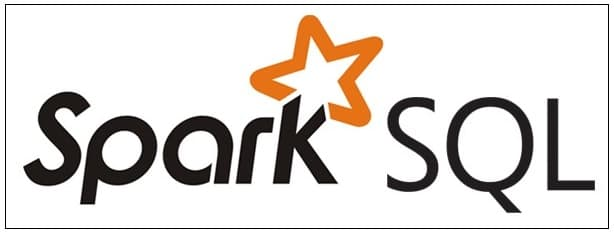

In [50]:
dt.createOrReplaceTempView("data")
dt_sql = spark.sql("SELECT * FROM data")
dt_sql.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [59]:
dt_sql_country = spark.sql("""
SELECT distinct country
FROM data
ORDER BY country
""")
dt_sql_country.count()

58

In [64]:
dt_sql_country = spark.sql("""
SELECT distinct country
FROM data
ORDER BY country
""")
dt_sql_country.show(58,False)

+------------------------+
|country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Japane                  |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|

In [65]:
dt_sql_clean = spark.sql("""
SELECT timestamp, user_id, book_id,
CASE WHEN country = 'Japane' THEN 'Japan' ELSE country END AS country,price
FROM data
""")
dt_sql_clean.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0